In [1]:
import numpy as np
import pandas as pd 
import obspy
import creep_event_picker as cep
import datetime as dt
import matplotlib.pyplot as plt
import inflect
stringify = inflect.engine()
import math
import os
import raw_to_obspy as rto
from os import listdir
from os.path import isfile, join
import importlib
import fnmatch

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


USGS to CSV

In [3]:
def find_files_with_wildcard(pattern, search_path):
    matching_files = []
    for root, dirs, files in os.walk(search_path):
        for file in files:
            if fnmatch.fnmatch(file, pattern):  # Use wildcard pattern matching
                matching_files.append(os.path.join(root, file))
    
    return matching_files

def import_USGS_Data(path):
    ''' import text file for creepmeter data
    input         path: path to data
    return          tm: time for data
    return min10_creep: slip for data'''

    vls = np.loadtxt(path, dtype = str)
    Year  = vls[:,0].astype(int)
    Time  = vls[:,1].astype(float)
    creep  = vls[:,2].astype(float)
    tm =np.array([dt.datetime(Year[k],1,1) + dt.timedelta(days = Time[k] -1) for k in range (0, len(Year))])
    df = pd.DataFrame({'Time':tm,'Slip':creep})
    return df

In [4]:
station = input('Please enter the station abbreviation')
network = 'Central_San_Andreas_Fault'#input('Please enter the network')
#Location_name = input('Please enter location name')

path = '../../Data/{k}/Raw/'.format(k=network)
file_to_add = find_files_with_wildcard(station+'*',path)[0]

data_source = input('Data recording type? Manual vs 10 min')
if data_source == 'm':
    print('Importing USGS File')
    df = import_USGS_Data(file_to_add)
    df.to_csv('../../Data/{k}/CSV/{p}_man.csv'.format(k=network,p=station[0:3]))
elif data_source == 'd':
    print('Importing USGS File')
    df = import_USGS_Data(file_to_add)
    df.to_csv('../../Data/{k}/CSV/{p}_day.csv'.format(k=network,p=station[0:3]))
else:
    print('Importing USGS File')
    df = import_USGS_Data(file_to_add)
    df.to_csv('../../Data/{k}/CSV/{p}.csv'.format(k=network,p=station[0:3]))
print(df)

KeyboardInterrupt: Interrupted by user

Creating CSV areas

In [ ]:
test_2 = pd.read_csv("../../../Data/Southern_San_Andreas_Fault/Ross_Road_Imperial_to_2022.txt")

In [ ]:
test_2

In [ ]:
test_2.drop(['coRRC'],axis=1)

In [ ]:
rr_23 = pd.read_csv('../../../Southern_CA_creepmeter_data/Ross_road_2022_2023.txt')
rr_23.rename(columns = {'SoCalDate':'Date','RR':'Slip'},inplace=True)
rr_to_22 = pd.read_csv('../../../Southern_CA_creepmeter_data/Ross_Road_Imperial_to_2022.txt')
rr_to_22.rename(columns={'coRRDAY':'Date','coRR':'Slip'},inplace=True)
rr_to_22.drop(['coRRC'], axis=1,inplace=True)

Ross_road=pd.concat([rr_to_22,rr_23],ignore_index=True)

In [ ]:
Ross_road

In [ ]:
Ross_road.to_csv('../../../Data/Southern_San_Andreas_Fault/CSV/rr.csv')

In [ ]:
Ross_road

In [ ]:
sh_23 = pd.read_csv('../../../Southern_CA_creepmeter_data/Superstition_to_Oct_2023.txt')
sh_23.rename(columns={'newSUtime':'Date','newSUmm1':'Slip','newSUC':'TempC'},inplace=True)
sh_23.Date = pd.to_datetime(sh_23.Date)
sh_23.to_csv('../../../Data/Southern_San_Andreas_Fault/CSV/sup2.csv')

In [ ]:
sh_04_19 = pd.read_csv('../../../Southern_CA_creepmeter_data/Superstition-2004_2019.txt')
sh_04_19.rename(columns={'SHday':'Date','SHmm':'Slip','SHT':'TempC'},inplace=True)
sh_04_19.Date = pd.to_datetime(sh_04_19.Date)
plt.figure()
plt.plot(sh_04_19.Date,sh_04_19.Slip)
plt.show()
sh_04_19.to_csv('../../../Data/Southern_San_Andreas_Fault/CSV/sup1.csv')

In [ ]:
sh_combo  = pd.concat([sh_04_19,sh_23])

In [ ]:
sh_combo.drop_duplicates(subset='Date',inplace=True)
sh_combo.to_csv('../../../Data/Southern_San_Andreas_Fault/CSV/sup.csv')

In [ ]:
plt.figure()
plt.plot(sh_combo.Date,sh_combo.Slip)
plt.show()

In [ ]:
durmid = pd.read_csv('../../../Data/Southern_San_Andreas_Fault/Raw/Durmid Hill Creep 2004-2024.txt')

In [ ]:
durmid.rename(columns={'SoCalDate':'Date','Durmid':'Slip'},inplace=True)
durmid.Date = pd.to_datetime(durmid.Date)
durmid.to_csv('../../../Data/Southern_San_Andreas_Fault/CSV/dmh.csv')

In [ ]:
#wsz = pd.read_csv("../../../Data/North_Anatolian_Fault/CSV/wsz.csv",names=['Date','Slip'])
wsz.to_csv("../../../Data/North_Anatolian_Fault/CSV/wsz.csv")

In [ ]:
#wsz.reset_index(inplace=True)
#wsz.drop([0,1],inplace=True)
#wsz.drop(['level_0','index'],axis=1,inplace=True)
#wsz.reset_index(inplace=True)
wsz.drop(['index'],axis=1,inplace=True)
wsz

In [ ]:
inw = pd.read_csv("../../Data/North_Anatolian_Fault/RAW/Ismetpasa North Wall 2004-2023.txt")
inw

In [ ]:
inw.rename(columns={'northday':'Date','northamm':'Slip'},inplace=True)

In [ ]:
inw.to_csv("../../../Data/North_Anatolian_Fault/CSV/inw.csv")

In [ ]:
isw = pd.read_csv("../../Data/North_Anatolian_Fault/RAW/South_wall_longer.txt", delimiter='\t')
isw

In [ ]:
isw.rename(columns={'IsmetpasSouthDay':'Date','IsmetpasaSouthDextral':'Slip'},inplace=True)

In [ ]:
isw.drop(['IsmetpasaSouth1'],axis=1,inplace=True)

In [ ]:
isw.to_csv("../../Data/North_Anatolian_Fault/CSV/isw.csv")

In [ ]:
cha = pd.read_csv("../../../Data/Chaman_Fault/RAW/Chaman creep event 2019 _ hourly data.txt")

In [ ]:
cha.rename(columns={'chamanDay':'Date','mm':'Slip'},inplace=True)
cha.to_csv("../../../Data/Chaman_Fault/CSV/cha.csv")

In [5]:
fc = pd.read_csv("../../Data/Central_San_Andreas_Fault/Raw/FoxCreekSouth to March 2024.txt")

fc['FoxSouthDAY'] = pd.to_datetime(fc['FoxSouthDAY'])
df_fox = pd.DataFrame({'Date':fc['FoxSouthDAY'],'Slip':fc['FoxSouthOblique']})
df_fox_T = pd.DataFrame({'Date':fc['FoxSouthDAY'],'degC':fc['FoxSouthdegC']})
df_fox_O = pd.DataFrame({'Date':fc['FoxSouthDAY'],'Ortho':fc['FoxSouthNormal']})

df_fox.to_csv(("../../Data/Central_San_Andreas_Fault/CSV/fxc1.csv"))
df_fox_T.to_csv(("../../Data/Central_San_Andreas_Fault/CSV/FoxCreek_Temp.csv"))
df_fox_O.to_csv(("../../Data/Central_San_Andreas_Fault/CSV/FoxCreek_Orthogonal.csv"))

                 northday  northC  northmm  northV
0        24/7/17 07:00:44  25.234 -11.1886    3.55
1        24/7/17 07:01:44  25.271 -11.1905    3.52
2        24/7/17 07:02:44  25.310 -11.1905    3.50
3        24/7/17 07:03:44  25.333 -11.1905    3.52
4        24/7/17 07:04:44  25.346 -11.1905    3.50
...                   ...     ...      ...     ...
2024166  27/5/24 09:16:36  17.259   0.6337     NaN
2024167  27/5/24 09:17:36  17.266   0.6337     NaN
2024168  27/5/24 09:18:36  17.284   0.6420     NaN
2024169  27/5/24 09:19:36  17.333   0.6456     NaN
2024170  27/5/24 09:20:36  17.370   0.6460     NaN

[2024171 rows x 4 columns]


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3230/2226456188.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pan['northday'] = pd.to_datetime(pan['northday'],dayfirst=True)


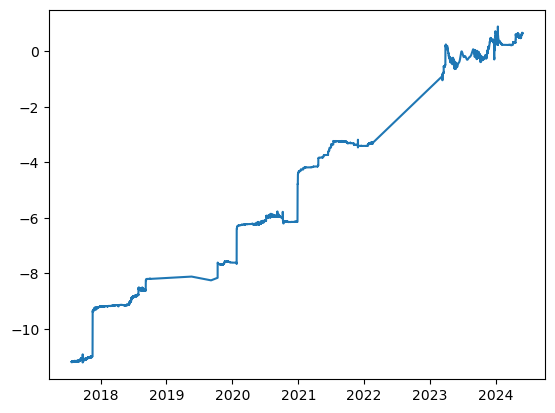

In [53]:
pan = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/PaluNorth.txt",delimiter='\t')
print(pan)
pan['northday'] = pd.to_datetime(pan['northday'],dayfirst=True)
df_pan = pd.DataFrame({'Date':pan['northday'],'Slip':pan['northmm']})
df_pan_T = pd.DataFrame({'Date':pan['northday'],'degC':pan['northC']})
df_pan_V = pd.DataFrame({'Date':pan['northday'],'Volts':pan['northV']})
df_pan_V.dropna(inplace=True)
df_pan_V.reset_index(inplace=True,drop=True)

plt.figure()
plt.plot(df_pan['Date'],df_pan['Slip'])
plt.show()

df_pan.to_csv(("../../Data/East_Anatolian_Fault/CSV/pan1.csv"))
df_pan_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluNorth_Temp.csv"))
df_pan_V.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluNorth_Voltage.csv"))


In [ ]:
pan

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/3307061942.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pas['southday'] = pd.to_datetime(pas['southday'],dayfirst=True)


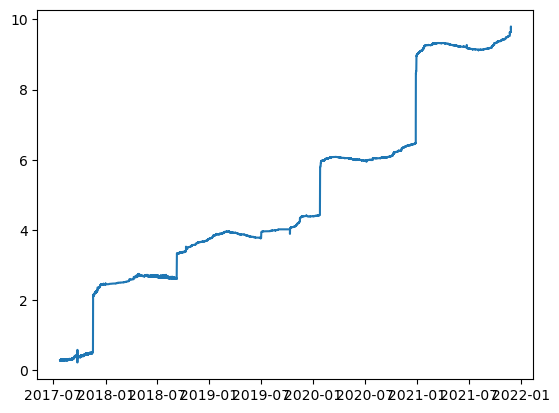

,southday,southC,Southmm,southv
0,2017-07-24 07:00:44,25.234,0.2830,0.2830
1,2017-07-24 07:01:44,25.271,0.2811,0.2811
2,2017-07-24 07:02:44,25.310,0.2811,0.2811
3,2017-07-24 07:03:44,25.333,0.2811,0.2811
4,2017-07-24 07:04:44,25.346,0.2811,0.2811
...,...,...,...,...
1497863,2022-02-22 06:41:59,8.070,NaN,NaN
1497864,2022-02-22 06:42:59,8.071,NaN,NaN
1497865,2022-02-22 06:43:59,8.071,NaN,NaN
1497866,2022-02-22 06:44:59,8.070,NaN,NaN


In [142]:
pas = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/PaluSouth.txt",delimiter='\t')
pas['southday'] = pd.to_datetime(pas['southday'],dayfirst=True)
df_pas = pd.DataFrame({'Date':pas['southday'],'Slip':pas['Southmm']})
df_pas_T = pd.DataFrame({'Date':pas['southday'],'degC':pas['southC']})
df_pas_V = pd.DataFrame({'Date':pas['southday'],'Volts':pas['southv']})
df_pas_V.dropna(inplace=True)
df_pas_V.reset_index(inplace=True,drop=True)
df_pas.dropna(inplace=True)
df_pas.reset_index(inplace=True,drop=True)


plt.figure()
plt.plot(df_pas['Date'],df_pas['Slip'])
plt.show()

df_pas.to_csv(("../../Data/East_Anatolian_Fault/CSV/pas1.csv"))
df_pas_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluSouth_Temp.csv"))
df_pas_V.to_csv(("../../Data/East_Anatolian_Fault/CSV/PaluSouth_Voltage.csv"))
pas

In [13]:
west_sazlik = pd.read_csv("../../Data/North_Anatolian_Fault/CSV/Old/Sazlik_file_test.csv")

In [14]:
west_sazlik['Time'] = pd.to_datetime(west_sazlik['Time'])
west_sazlik['diff'] = west_sazlik['2019_event_excel'] - west_sazlik['Igor_sazlik_excel']
west_sazlik

,Time,2019_event_excel,Igor_sazlik_excel,diff
0,2019-10-09 12:08:00,0.570615,-19.2906,19.861215
1,2019-10-09 12:09:00,0.570215,-19.2910,19.861215
2,2019-10-09 12:10:00,0.570215,-19.2910,19.861215
3,2019-10-09 12:11:00,0.570215,-19.2910,19.861215
4,2019-10-09 12:12:00,0.570215,-19.2910,19.861215
...,...,...,...,...
147136,2020-01-19 20:34:00,9.519710,-10.3519,19.871610
147137,2020-01-19 20:35:00,9.519410,-10.3522,19.871610
147138,2020-01-19 20:36:00,9.519410,-10.3522,19.871610
147139,2020-01-19 20:37:00,9.519710,-10.3519,19.871610


In [15]:
%matplotlib qt
fig = plt.figure()
ax1= plt.subplot(2,1,1)
plt.plot(west_sazlik['Time'],west_sazlik['2019_event_excel'])
plt.plot(west_sazlik['Time'],west_sazlik['Igor_sazlik_excel']+19.87)
ax2 = plt.subplot(2,1,2,sharex=ax1)
plt.plot(west_sazlik['Time'],west_sazlik['diff'])
fig.set_size_inches(15,5)
plt.show()

Sazlik

In [42]:
dfs = pd.read_excel('../../Data/North_Anatolian_Fault/Raw/Sazlik2017-2023.xlsx', sheet_name=[0,1,2,3,4])

In [43]:
dfs[0].rename(columns = {'sazlik west':'Slip W','date time':'Date','SazlikEast':'Slip E'},inplace=True)
dfs[1].rename(columns = {'WSazlikmm':'Slip W','date time':'Date','EastSazlickmm':'Slip E'},inplace=True)
dfs[2].rename(columns = {'WSazlikmm':'Slip W','date time':'Date','EastSazlickmm':'Slip E'},inplace=True)
dfs[3].rename(columns = {'mm':'Slip W','datetimeWSazlik':'Date'},inplace=True)

In [44]:
all_sheets_df = pd.concat(dfs.values())

In [45]:
all_sheets_df.reset_index(inplace=True,drop=True)
all_sheets_df

,Date,Slip W,degC,Slip E,WSazlikIR
0,2017-12-04 09:08:27,3.6900,7.624,7.5627,NaN
1,2017-12-04 09:13:27,3.6900,7.624,7.5383,NaN
2,2017-12-04 09:18:27,3.6900,7.624,7.5388,NaN
3,2017-12-04 09:23:27,3.6900,7.624,7.5377,NaN
4,2017-12-04 09:28:27,3.6900,7.531,7.5370,NaN
...,...,...,...,...,...
2312034,2023-06-07 12:16:17,8.2322,17.623,NaN,NaN
2312035,2023-06-07 12:17:17,8.2322,17.626,NaN,NaN
2312036,2023-06-07 12:18:17,8.2322,17.629,NaN,NaN
2312037,2023-06-07 12:19:17,8.2537,17.636,NaN,NaN


In [46]:
west_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'Slip':all_sheets_df['Slip W']})
west_sazlik.dropna(inplace=True)
west_sazlik.reset_index(inplace=True,drop=True)
west_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/wsz1.csv")

In [47]:
east_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'Slip':all_sheets_df['Slip E']})
east_sazlik.dropna(inplace=True)
east_sazlik.reset_index(inplace=True,drop=True)
east_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/esz1.csv")

In [48]:
west_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'IR':all_sheets_df['WSazlikIR']})
west_sazlik.dropna(inplace=True)
west_sazlik.reset_index(inplace=True,drop=True)
west_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/wsz_IR.csv")

In [49]:
west_sazlik = pd.DataFrame({'Date':all_sheets_df['Date'],'degC':all_sheets_df['degC']})
west_sazlik.dropna(inplace=True)
west_sazlik.reset_index(inplace=True,drop=True)
west_sazlik.to_csv("../../Data/North_Anatolian_Fault/CSV/Sazlik_Temp.csv")

Hamamli

In [25]:
df = pd.read_csv('../../Data/North_Anatolian_Fault/CSV/Old/Hamamli_23AUG2019_20JAN2020.csv',header=None)

In [26]:
df.rename(columns = {0:'Date',1:'Slip'},inplace=True)
df.to_csv("../../Data/North_Anatolian_Fault/CSV/ham1.csv")

Cherry

In [31]:
df1 = pd.read_csv('../../Data/North_Anatolian_Fault/CSV/Old/CherryPt1.csv')

In [32]:
df1['cherryday'] = pd.to_datetime(df1['cherryday'],dayfirst=True)
df1.rename(columns = {'cherryday':'Date','cherrymm':'Slip'},inplace=True)
df1

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/414755721.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['cherryday'] = pd.to_datetime(df1['cherryday'],dayfirst=True)


,Date,cherryC,Slip
0,2019-02-12 11:29:33,6.560,4.7534
1,2019-02-12 11:30:33,6.602,4.7463
2,2019-02-12 11:31:33,6.507,4.7489
3,2019-02-12 11:32:33,6.491,4.7430
4,2019-02-12 11:33:33,6.514,4.7432
...,...,...,...
342845,2019-10-08 13:34:33,13.373,0.8679
342846,2019-10-08 13:35:33,13.374,0.8679
342847,2019-10-08 13:36:33,13.374,0.8679
342848,2019-10-08 13:37:33,13.374,0.8677


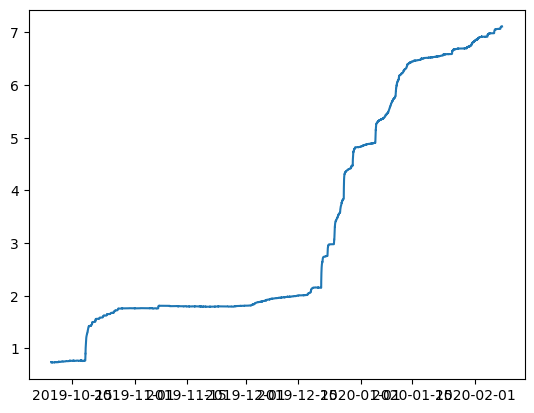

In [42]:
df2 = pd.read_csv('../../Data/North_Anatolian_Fault/CSV/Old/Cherry_09OCT2019_08FEB2020.csv',header=None)
df2.rename(columns = {0:'Date',1:'Slip'},inplace=True)
df2['Date']=pd.to_datetime(df2['Date'])

plt.figure()
plt.plot(df2['Date'],df2['Slip'])
plt.show()

In [43]:
df_all = pd.concat([df1,df2])
df_all

,Date,cherryC,Slip
0,2019-02-12 11:29:33,6.560,4.7534
1,2019-02-12 11:30:33,6.602,4.7463
2,2019-02-12 11:31:33,6.507,4.7489
3,2019-02-12 11:32:33,6.491,4.7430
4,2019-02-12 11:33:33,6.514,4.7432
...,...,...,...
350969,2020-02-08 05:58:56,NaN,7.1123
350970,2020-02-08 05:59:26,NaN,7.1130
350971,2020-02-08 05:59:56,NaN,7.1132
350972,2020-02-08 06:00:08,NaN,NaN


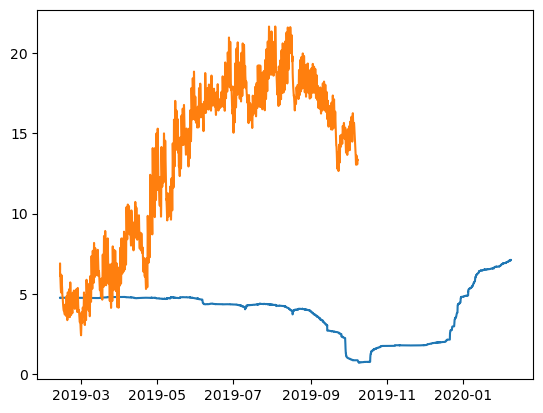

In [44]:
plt.figure()
plt.plot(df_all['Date'],df_all['Slip'])
plt.plot(df_all['Date'],df_all['cherryC'])
plt.show()

In [45]:
df_cherry_T = pd.DataFrame({'Date':df_all['Date'],'degC':df_all['cherryC']})
df_cherry_T.dropna(inplace=True)
df_cherry_T.reset_index(inplace=True,drop=True)
df_cherry_T.to_csv("../../Data/North_Anatolian_Fault/CSV/Cherry_Temp.csv")

In [46]:
df_cherry = pd.DataFrame({'Date':df_all['Date'],'Slip':df_all['Slip']})
df_cherry.dropna(inplace=True)
df_cherry.reset_index(inplace=True,drop=True)
df_cherry.to_csv("../../Data/North_Anatolian_Fault/CSV/che1.csv")

In [55]:
inw = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/NorthWall.txt',delimiter='\t')
inw.rename(columns = {'northday':'Date','northamm':'Slip'},inplace=True)
inw['Date'] = pd.to_datetime(inw['Date'],dayfirst=True)
inw.to_csv("../../Data/North_Anatolian_Fault/CSV/inw1.csv")
inw

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3230/1214887302.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inw['Date'] = pd.to_datetime(inw['Date'],dayfirst=True)


,Date,Slip
0,2014-05-22 00:00:00,-51.763900
1,2014-05-22 00:38:27,-51.763900
2,2014-05-22 01:08:27,-51.763900
3,2014-05-22 01:38:27,-51.763900
4,2014-05-22 02:08:27,-51.763900
...,...,...
2005050,2023-09-16 10:08:00,0.379905
2005051,2023-09-16 10:09:00,0.379905
2005052,2023-09-16 10:10:00,0.379905
2005053,2023-09-16 10:11:00,0.380205


In [2]:
isw = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/SouthWall.txt',delimiter='\t')
isw

,IsmetpasSouthDay,IsmetpasaSouthDextral,IsmetpasaSouth1
0,5/10/18 13:17:55,-26.6381,-21.8524
1,5/10/18 13:18:55,-26.6465,-21.8593
2,5/10/18 13:19:55,-26.6465,-21.8593
3,5/10/18 13:20:55,-26.6465,-21.8593
4,5/10/18 13:21:55,-26.6315,-21.8470
...,...,...,...
2521406,26/9/24 21:40:00,10.8030,8.8622
2521407,26/9/24 21:50:00,10.8030,8.8622
2521408,26/9/24 22:00:00,10.8030,8.8622
2521409,26/9/24 22:10:00,10.8030,8.8622


In [4]:
df_isw = pd.DataFrame({'Date':isw['IsmetpasSouthDay'],'Slip':isw['IsmetpasaSouthDextral']})
df_isw['Date'] = pd.to_datetime(df_isw['Date'],dayfirst=True)
df_isw.to_csv("../../Data/North_Anatolian_Fault/CSV/isw1.csv")
df_isw

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_11790/3559442102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_isw['Date'] = pd.to_datetime(df_isw['Date'],dayfirst=True)


,Date,Slip
0,2018-10-05 13:17:55,-26.6381
1,2018-10-05 13:18:55,-26.6465
2,2018-10-05 13:19:55,-26.6465
3,2018-10-05 13:20:55,-26.6465
4,2018-10-05 13:21:55,-26.6315
...,...,...
2521406,2024-09-26 21:40:00,10.8030
2521407,2024-09-26 21:50:00,10.8030
2521408,2024-09-26 22:00:00,10.8030
2521409,2024-09-26 22:10:00,10.8030


Sivrice

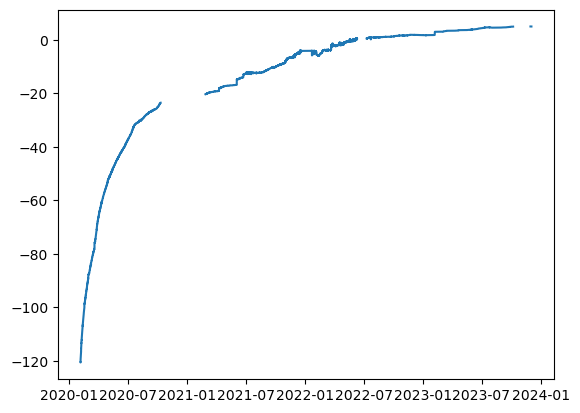

[]


In [159]:
siv1 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Sivrice2020_3.txt")
siv1.rename(columns={'SivriceDay':'Date','Sivricemm':'Slip','SivricdegC':'degC'},inplace=True)
siv1['Date'] = pd.to_datetime(siv1['Date'],dayfirst=False)
plt.figure()
plt.plot(siv1['Date'],siv1['Slip'])
plt.show()
tm_diff = np.diff(siv1['Date'])/ np.timedelta64(1, 'm')
print(tm_diff[tm_diff < 0])

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/2179482678.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  siv2['Date'] = pd.to_datetime(siv2['Date'],dayfirst=True)


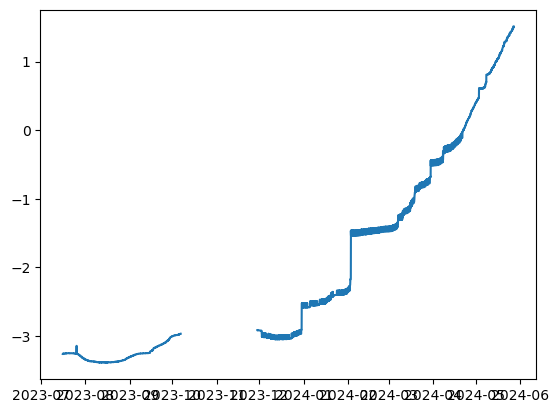

[]


In [160]:
siv2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Sivrice_pt2.csv")
siv2.rename(columns={'SivDay':'Date','Sivmm':'Slip','SivC':'degC'},inplace=True)
siv2['Date'] = pd.to_datetime(siv2['Date'],dayfirst=True)
plt.figure()
plt.plot(siv2['Date'],siv2['Slip'])
plt.show()
tm_diff = np.diff(siv2['Date'])/ np.timedelta64(1, 'm')
print(tm_diff[tm_diff < 0])

In [170]:
boolarr = siv1['Date'] < siv2['Date'].iloc[0]
siv1_s = siv1[boolarr]

In [172]:
siv = pd.concat([siv1_s,siv2],ignore_index=True)
siv.dropna(inplace=True)
tm_diff = np.diff(siv['Date'])/ np.timedelta64(1, 'm')
print(tm_diff[tm_diff < 0])
print(siv1_s.iloc[-1],siv2.iloc[0])

[]
Date    2023-07-16 01:37:00
Slip                 4.6871
degC                  19.27
Name: 4904122, dtype: object Date    2023-07-16 01:38:00
degC                  19.27
Slip                 4.6871
Name: 0, dtype: object


In [173]:
%matplotlib qt
plt.figure()
plt.plot(siv['Date'],siv['Slip'])
plt.show()

In [165]:
siv1_s

,Date,Slip,degC
0,2020-02-05 11:47:51,-120.5840,7.048
1,2020-02-05 11:48:01,-120.5900,7.100
2,2020-02-05 11:48:11,-120.4170,7.141
3,2020-02-05 11:48:21,-120.4110,6.851
4,2020-02-05 11:48:31,-120.4110,6.840
...,...,...,...
4904118,2023-07-16 01:33:00,4.6871,19.270
4904119,2023-07-16 01:34:00,4.6875,19.270
4904120,2023-07-16 01:35:00,4.6871,19.270
4904121,2023-07-16 01:36:00,4.6875,19.270


In [174]:
df_siv = pd.DataFrame({'Date':siv['Date'],'Slip':siv['Slip']})
df_siv_T = pd.DataFrame({'Date':siv['Date'],'degC':siv['degC']})
df_siv.to_csv(("../../Data/East_Anatolian_Fault/CSV/siv1.csv"))
df_siv_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Sivrice.csv"))

Balikburnu

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/3089962153.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bal['Date'] = pd.to_datetime(bal['Date'],dayfirst=True)


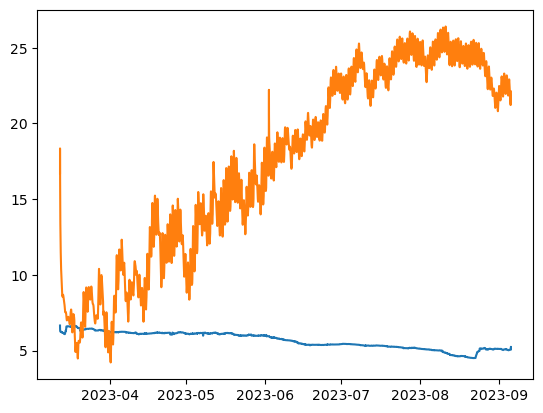

In [70]:
bal = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Balikburnu.txt",delimiter='\t')
bal.rename(columns={'BalikburnuDay':'Date','Balikburnumm':'Slip','BalikburnuDegC':'degC'},inplace=True)
bal['Date'] = pd.to_datetime(bal['Date'],dayfirst=True)

df_bal = pd.DataFrame({'Date':bal['Date'],'Slip':bal['Slip']})
df_bal_T = pd.DataFrame({'Date':bal['Date'],'degC':bal['degC']})

plt.figure()
plt.plot(df_bal['Date'],df_bal['Slip'])
plt.plot(df_bal_T['Date'],df_bal_T['degC'])
plt.show()


df_bal.to_csv(("../../Data/East_Anatolian_Fault/CSV/bal1.csv"))
df_bal_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Balikburnu_Temp.csv"))

In [71]:
bal

,Date,degC,Slip
0,2023-03-12 10:47:55,16.717,6.6559
1,2023-03-12 10:48:55,16.761,6.6539
2,2023-03-12 10:49:55,17.317,6.6433
3,2023-03-12 10:50:55,17.702,6.6460
4,2023-03-12 10:51:55,17.965,6.6433
...,...,...,...
254899,2023-09-05 13:11:16,21.424,5.2414
254900,2023-09-05 13:12:16,21.427,5.2380
254901,2023-09-05 13:13:16,21.431,5.2119
254902,2023-09-05 13:14:16,21.563,5.2499


Gozene

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3230/1288823571.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  goz['Date'] = pd.to_datetime(goz['Date'],dayfirst=True)


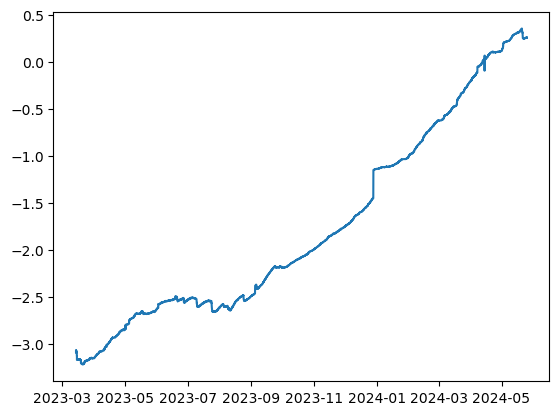

In [50]:
goz = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Gozene.txt",delimiter='\t')
goz.rename(columns={'GozeneDay':'Date','Gozene':'Slip','GozeneDegC':'degC'},inplace=True)
goz['Date'] = pd.to_datetime(goz['Date'],dayfirst=True)
df_goz = pd.DataFrame({'Date':goz['Date'],'Slip':goz['Slip']})
df_goz_T = pd.DataFrame({'Date':goz['Date'],'degC':goz['degC']})
plt.figure()
plt.plot(df_goz['Date'],df_goz['Slip'])
plt.show()


df_goz.to_csv(("../../Data/East_Anatolian_Fault/CSV/goz1.csv"))
df_goz_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Gozene_Temp.csv"))

In [2]:
multi_instument = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/Multi_instrument.txt",delimiter='\t')
multi_instument['CreepUTC'] = pd.to_datetime(multi_instument['CreepUTC'],dayfirst=True)
multi_instument

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_14645/399390720.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  multi_instument['CreepUTC'] = pd.to_datetime(multi_instument['CreepUTC'],dayfirst=True)


,CreepUTC,Tasmis,Sivrice,KarakoseOblique,KarakoseOthogonal,Goksun,Kirikhan,Hassa,Hatay,Ormanici1,IsmetpasaNorth,IsmetpasaSouth,elapsedCreeptime
0,2023-03-06 14:49:00,NaN,3.0106,NaN,NaN,NaN,2.6645,NaN,41.9845,NaN,-0.9612,3.1385,2434072.0
1,2023-03-06 14:50:00,NaN,3.0106,NaN,NaN,NaN,2.6641,NaN,41.9861,NaN,-0.9612,3.1385,2434132.0
2,2023-03-06 14:51:00,NaN,3.0106,NaN,NaN,NaN,2.6641,NaN,41.9861,NaN,-0.9612,3.1385,2434192.0
3,2023-03-06 14:52:00,NaN,3.0106,NaN,NaN,NaN,2.6641,NaN,41.9865,NaN,-0.9612,3.1385,2434252.0
4,2023-03-06 14:53:00,NaN,3.0106,NaN,NaN,NaN,2.6641,NaN,41.9861,NaN,-0.9612,3.1385,2434312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351874,2023-11-05 23:33:00,5.4144,4.7722,8.8666,7.1274,NaN,NaN,NaN,NaN,NaN,0.3103,6.2381,NaN
351875,2023-11-05 23:34:00,5.4144,4.7726,8.8666,7.1274,NaN,NaN,NaN,NaN,NaN,0.3103,6.2381,NaN
351876,2023-11-05 23:35:00,5.4144,4.7722,8.8666,7.1274,NaN,NaN,NaN,NaN,NaN,0.3103,6.2381,NaN
351877,2023-11-05 23:36:00,5.4141,4.7722,8.8666,7.1274,NaN,NaN,NaN,NaN,NaN,0.3103,6.2381,NaN


In [52]:
df_has = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Hassa']})
df_has.dropna(inplace=True)
df_has.reset_index(inplace=True,drop=True)
df_has.to_csv(("../../Data/East_Anatolian_Fault/CSV/has1.csv"))
df_has

,Date,Slip
0,2023-03-07 15:54:00,3.6481
1,2023-03-07 15:55:00,3.6481
2,2023-03-07 15:56:00,3.6481
3,2023-03-07 15:57:00,3.6481
4,2023-03-07 15:58:00,3.6481
...,...,...
241615,2023-08-22 10:59:00,5.6680
241616,2023-08-22 11:00:00,5.6680
241617,2023-08-22 11:01:00,5.6680
241618,2023-08-22 11:02:00,5.6680


In [75]:
df_hat = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Hatay']})
df_hat.dropna(inplace=True)
df_hat.reset_index(inplace=True,drop=True)
df_hat.to_csv(("../../Data/East_Anatolian_Fault/CSV/hat1.csv"))
df_hat

,Date,Slip
0,2023-03-06 14:49:00,41.9845
1,2023-03-06 14:50:00,41.9861
2,2023-03-06 14:51:00,41.9861
3,2023-03-06 14:52:00,41.9865
4,2023-03-06 14:53:00,41.9861
...,...,...
197904,2023-10-20 22:31:00,-1.2816
197905,2023-10-20 22:32:00,-1.2816
197906,2023-10-20 22:33:00,-1.2820
197907,2023-10-20 22:34:00,-1.2816


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/4162253444.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  yze['Date'] = pd.to_datetime(yze['Date'],dayfirst=True)


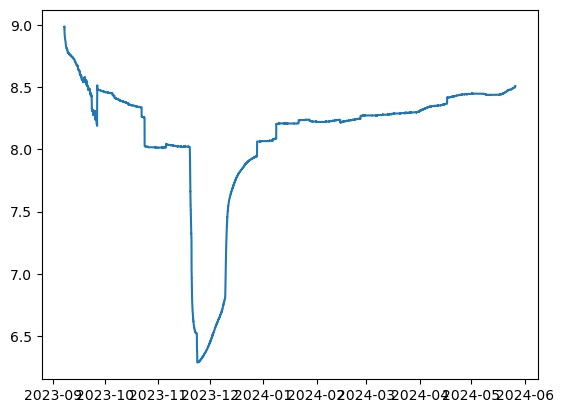

,Date,degC,Slip
0,2023-09-07 10:36:07,37.697,8.9858
1,2023-09-07 10:37:07,37.384,8.9867
2,2023-09-07 10:38:07,37.109,8.9860
3,2023-09-07 10:39:07,36.957,8.9836
4,2023-09-07 10:40:07,36.838,8.9832
...,...,...,...
377219,2024-05-26 12:55:57,24.561,8.5071
377220,2024-05-26 12:56:57,24.567,8.5071
377221,2024-05-26 12:57:57,23.663,8.5086
377222,2024-05-26 12:58:54,NaN,NaN


In [78]:
yze = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/YazicaEast.txt",delimiter='\t')
yze.rename(columns={'YasicaEastDay':'Date','YasicaEastmm':'Slip','YasicaEastDegC':'degC'},inplace=True)
yze['Date'] = pd.to_datetime(yze['Date'],dayfirst=True)
df_yze = pd.DataFrame({'Date':yze['Date'],'Slip':yze['Slip']})
df_yze_T = pd.DataFrame({'Date':yze['Date'],'degC':yze['degC']})
plt.figure()
plt.plot(yze['Date'],yze['Slip'])
plt.show()

df_yze.to_csv(("../../Data/East_Anatolian_Fault/CSV/yze1.csv"))
df_yze_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/YazicaEast_Temp.csv"))
yze

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/3430887282.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  yzw['Date'] = pd.to_datetime(yzw['Date'],dayfirst=True)


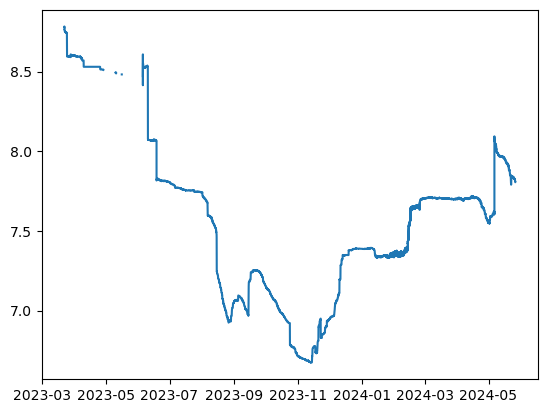

,Date,degC,Slip
0,2023-03-22 10:59:37,20.442,8.7803
1,2023-03-22 11:00:37,20.583,8.7830
2,2023-03-22 11:01:37,21.033,8.7804
3,2023-03-22 11:02:37,21.264,8.7798
4,2023-03-22 11:03:37,21.370,8.7781
...,...,...,...
614779,2024-05-26 14:07:09,22.091,7.8066
614780,2024-05-26 14:08:09,22.082,7.8062
614781,2024-05-26 14:09:09,22.073,7.8066
614782,2024-05-26 14:10:09,22.066,7.8064


In [80]:
yzw = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/YazicaWest.txt",delimiter='\t')
yzw.rename(columns={'Yazicaday':'Date','Yazica':'Slip','YazicadegC':'degC'},inplace=True)
yzw['Date'] = pd.to_datetime(yzw['Date'],dayfirst=True)
df_yzw = pd.DataFrame({'Date':yzw['Date'],'Slip':yzw['Slip']})
df_yzw_T = pd.DataFrame({'Date':yzw['Date'],'degC':yzw['degC']})
plt.figure()
plt.plot(yzw['Date'],yzw['Slip'])
plt.show()

df_yzw.to_csv(("../../Data/East_Anatolian_Fault/CSV/yzw1.csv"))
df_yzw_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/YazicaWest_Temp.csv"))
yzw

Cerkes

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/1306140763.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cer['cerkesUT'] = pd.to_datetime(cer['cerkesUT'],dayfirst=True)


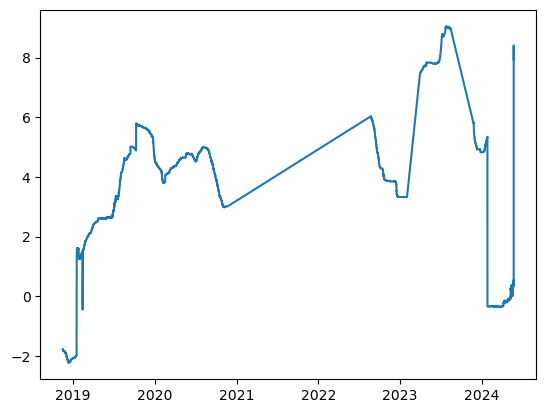

,cerkesUT,cerkesDegC,CerkesDisplacement
0,2018-11-15 14:35:41,6.322,-1.7730
1,2018-11-15 14:36:41,6.398,-1.7759
2,2018-11-15 14:37:41,6.414,-1.7774
3,2018-11-15 14:38:41,6.418,-1.7839
4,2018-11-15 14:39:41,6.420,-1.7836
...,...,...,...
2568191,2024-05-23 10:21:34,18.788,0.5244
2568192,2024-05-23 10:22:34,86.422,8.4011
2568193,2024-05-23 10:23:34,82.890,8.0863
2568194,2024-05-23 10:24:34,83.314,7.9706


In [81]:
cer = pd.read_csv("../../Data/North_Anatolian_Fault/Raw/Cerkes.txt",delimiter='\t')
cer['cerkesUT'] = pd.to_datetime(cer['cerkesUT'],dayfirst=True)
df_cer = pd.DataFrame({'Date':cer['cerkesUT'],'Slip':cer['CerkesDisplacement']})
df_cer_T = pd.DataFrame({'Date':cer['cerkesUT'],'degC':cer['cerkesDegC']})

plt.figure()
plt.plot(df_cer['Date'],df_cer['Slip'])
plt.show()

df_cer.to_csv(("../../Data/North_Anatolian_Fault/CSV/cer1.csv"))
df_cer_T.to_csv(("../../Data/North_Anatolian_Fault/CSV/Cerkes_Temp.csv"))
cer

Goksun

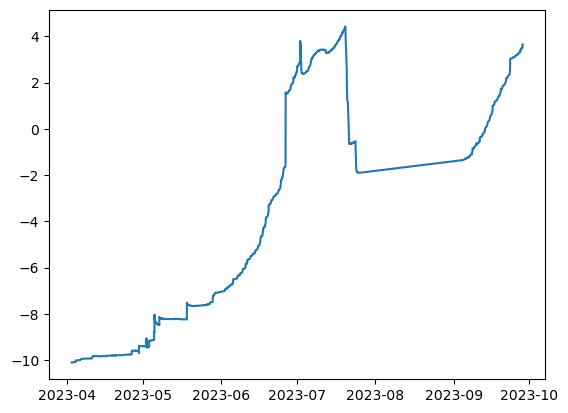

In [82]:
Gok1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Goksun']})
Gok1.dropna(inplace=True)
plt.figure()
plt.plot(Gok1['Date'],Gok1['Slip'])

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/3633013905.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Gok2['GoksunDay'] = pd.to_datetime(Gok2['GoksunDay'],dayfirst=True)


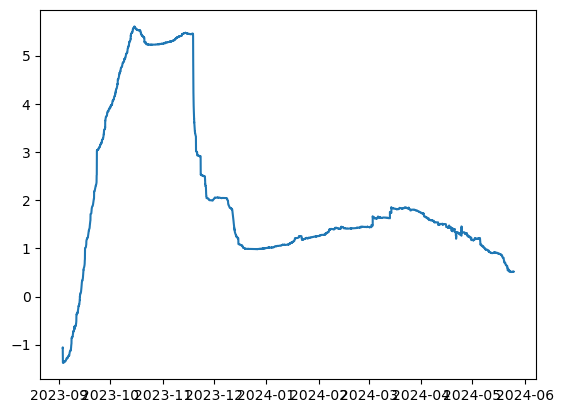

In [83]:
Gok2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/GoksunPt2.txt",delimiter='\t')
Gok2['GoksunDay'] = pd.to_datetime(Gok2['GoksunDay'],dayfirst=True)
plt.figure()
plt.plot(Gok2['GoksunDay'],Gok2['Goksunmm'])
plt.show()

In [84]:
boolarr = Gok2['GoksunDay']>Gok1['Date'].iloc[-1]
Gok2 = Gok2[boolarr]
Gok2.rename(columns={'GoksunDay':'Date','Goksunmm':'Slip','GoksunDegC':'degC','GoksunOrtho':'Ortho'},inplace=True)
Gok2

,Date,degC,Slip,Ortho
35880,2023-09-28 07:16:36,22.357,3.6496,NaN
35881,2023-09-28 07:17:36,22.239,3.6499,NaN
35882,2023-09-28 10:26:58,23.945,3.6494,NaN
35883,2023-09-28 10:27:58,24.139,3.6496,NaN
35884,2023-09-28 10:28:58,25.727,3.6496,NaN
...,...,...,...,...
379693,2024-05-25 04:28:52,11.479,0.5163,8.9065
379694,2024-05-25 04:29:52,11.496,0.5157,8.9063
379695,2024-05-25 04:30:52,11.514,0.5113,8.9078
379696,2024-05-25 04:31:52,11.535,0.5131,8.9073


In [85]:
gok = pd.concat([Gok1,Gok2],ignore_index=True)
df_gok = pd.DataFrame({'Date':gok['Date'],'Slip':gok['Slip']})
df_gok_T = pd.DataFrame({'Date':gok['Date'],'degC':gok['degC']})
df_gok_T.dropna(inplace=True)
df_gok_T.reset_index(inplace=True,drop=True)
df_gok_ortho = pd.DataFrame({'Date':gok['Date'],'Ortho':gok['Ortho']})
df_gok_ortho.dropna(inplace=True)
df_gok_ortho.reset_index(inplace=True,drop=True)
df_gok.to_csv(("../../Data/East_Anatolian_Fault/CSV/gok1.csv"))
df_gok_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Goksun_Temp.csv"))
df_gok_ortho.to_csv(("../../Data/East_Anatolian_Fault/CSV/Goksun_Orthogonal.csv"))

Ormanice

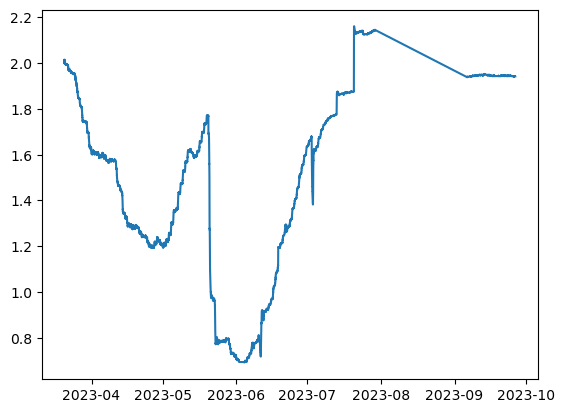

In [86]:
Orm1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Ormanici1']})
Orm1.dropna(inplace=True)
plt.figure()
plt.plot(Orm1['Date'],Orm1['Slip'])
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/1438137799.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Orm2['OrmaniceDay'] = pd.to_datetime(Orm2['OrmaniceDay'],dayfirst=True)


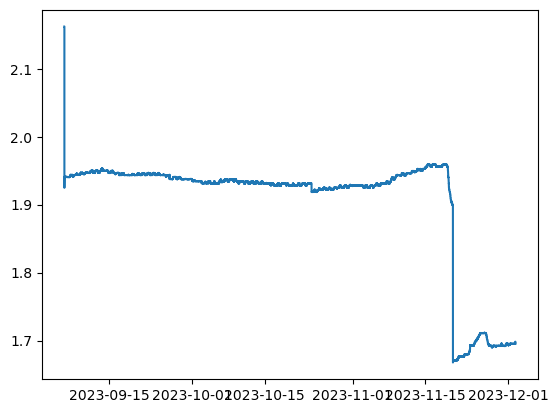

In [89]:
Orm2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/OrmanicePt2.txt",delimiter='\t')
Orm2['OrmaniceDay'] = pd.to_datetime(Orm2['OrmaniceDay'],dayfirst=True)
plt.figure()
plt.plot(Orm2['OrmaniceDay'],Orm2['Ormanicemm'])
plt.show()

In [90]:
boolarr = Orm2['OrmaniceDay']>Orm1['Date'].iloc[-1]
Orm2 = Orm2[boolarr]
Orm2.rename(columns={'OrmaniceDay':'Date','Ormanicemm':'Slip','OrmaniceDegC':'degC'},inplace=True)
Orm2

,Date,degC,Slip
29209,2023-09-26 14:47:27,17.894,1.9429
29210,2023-09-26 14:50:01,18.065,1.9441
29211,2023-09-26 14:51:01,18.090,1.9439
29212,2023-09-26 14:52:01,18.130,1.9379
29213,2023-09-26 14:53:01,18.143,1.9379
...,...,...,...
125313,2023-12-02 08:33:01,4.001,1.6950
125314,2023-12-02 08:34:01,4.001,1.6950
125315,2023-12-02 08:35:01,3.999,1.6983
125316,2023-12-02 08:36:01,3.999,1.6981


In [91]:
orm = pd.concat([Orm1,Orm2],ignore_index=True)
df_orm = pd.DataFrame({'Date':orm['Date'],'Slip':orm['Slip']})
df_orm_T = pd.DataFrame({'Date':orm['Date'],'degC':orm['degC']})
df_orm_T.dropna(inplace=True)
df_orm_T.reset_index(inplace=True,drop=True)

df_orm.to_csv(("../../Data/East_Anatolian_Fault/CSV/orm1.csv"))
df_orm_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Ormanice_Temp.csv"))


Kirikhan

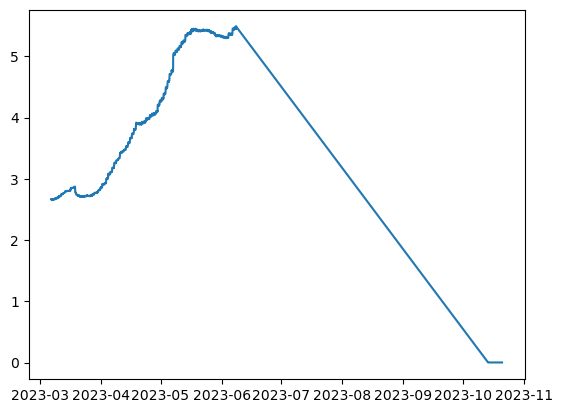

328827   2023-10-20 22:27:00
328828   2023-10-20 22:28:00
328829   2023-10-20 22:29:00
328830   2023-10-20 22:30:00
328831   2023-10-20 22:31:00
328832   2023-10-20 22:32:00
328833   2023-10-20 22:33:00
328834   2023-10-20 22:34:00
328835   2023-10-20 22:35:00
328836   2023-10-20 22:36:00
Name: Date, dtype: datetime64[ns]


In [176]:
%matplotlib inline
Kir1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Kirikhan']})
Kir1.dropna(inplace=True)
plt.figure()
plt.plot(Kir1['Date'],Kir1['Slip'])
plt.show()
print(Kir1['Date'].tail(10))

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/2806609219.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Kir2['Kday'] = pd.to_datetime(Kir2['Kday'],dayfirst=True)


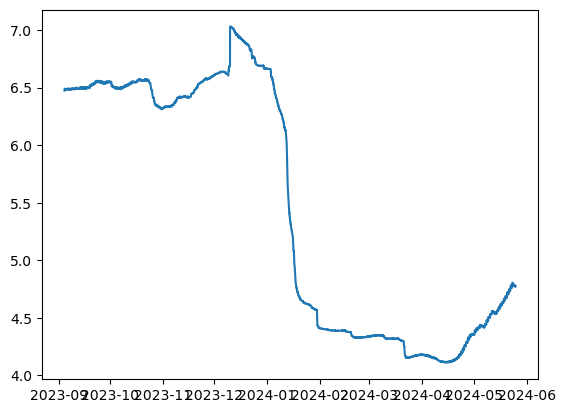

0   2023-09-04 09:09:01
1   2023-09-04 09:10:01
2   2023-09-04 09:11:01
3   2023-09-04 09:12:01
4   2023-09-04 09:13:01
Name: Kday, dtype: datetime64[ns]


In [180]:
Kir2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/KirikhanPt2.txt",delimiter='\t')
Kir2['Kday'] = pd.to_datetime(Kir2['Kday'],dayfirst=True)
plt.figure()
plt.plot(Kir2['Kday'],Kir2['Kmm'])
plt.show()
print(Kir2['Kday'].head())

In [181]:
boolarr = Kir1['Date']<Kir2['Kday'].iloc[0]
Kir1_s = Kir1[boolarr]
Kir2.rename(columns={'Kday':'Date','Kmm':'Slip','KdegC':'degC'},inplace=True)
Kir1_s

,Date,Slip
0,2023-03-06 14:49:00,2.6645
1,2023-03-06 14:50:00,2.6641
2,2023-03-06 14:51:00,2.6641
3,2023-03-06 14:52:00,2.6641
4,2023-03-06 14:53:00,2.6641
...,...,...
134874,2023-06-08 06:43:00,5.4869
134875,2023-06-08 06:44:00,5.4865
134876,2023-06-08 06:45:00,5.4873
134877,2023-06-08 06:46:00,5.4877


In [183]:
kir = pd.concat([Kir1_s,Kir2],ignore_index=True)
df_kir = pd.DataFrame({'Date':kir['Date'],'Slip':kir['Slip']})
df_kir_T = pd.DataFrame({'Date':kir['Date'],'degC':kir['degC']})
df_kir_T.dropna(inplace=True)
df_kir_T.reset_index(inplace=True,drop=True)

df_kir.to_csv(("../../Data/East_Anatolian_Fault/CSV/kir1.csv"))
df_kir_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Kirikhan_Temp.csv"))

Karakose

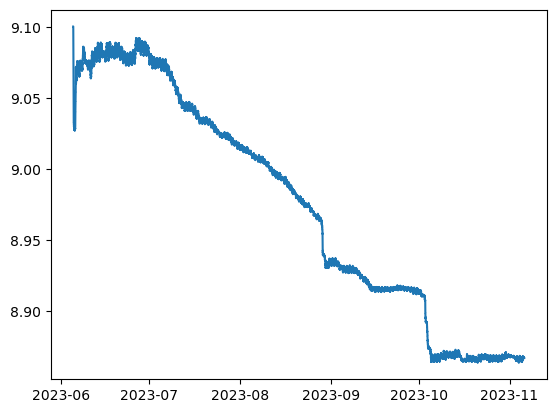

,Date,Slip,Ortho
351933,2023-11-05 23:33:00,8.8666,7.1274
351934,2023-11-05 23:34:00,8.8666,7.1274
351935,2023-11-05 23:35:00,8.8666,7.1274
351936,2023-11-05 23:36:00,8.8666,7.1274
351937,2023-11-05 23:37:00,8.8666,7.1274


In [184]:
Kar1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['KarakoseOblique'],'Ortho':multi_instument['KarakoseOthogonal']})
Kar1.dropna(inplace=True)
plt.figure()
plt.plot(Kar1['Date'],Kar1['Slip'])
plt.show()
Kar1.tail()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/1360779953.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Kar2["'kkdate!\'"] = pd.to_datetime(Kar2["'kkdate!\'"],dayfirst=True)


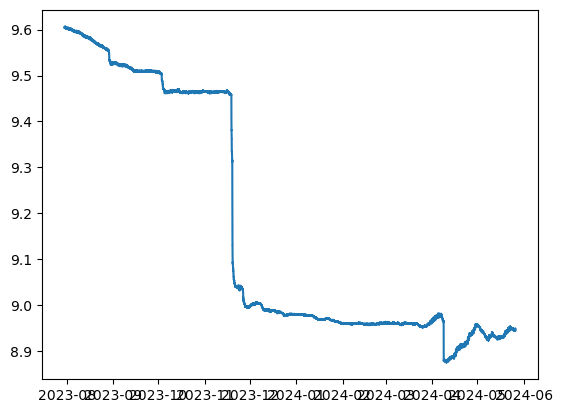

,'kkdate!',kkoblique,kkObliqueV,kkorthogonal,kkorthoogonalV,kkdegC
0,2023-07-30 09:37:00,9.60436,9.8381,3.7055,5.00512,27.0874
1,2023-07-30 09:38:00,9.60436,9.8381,3.7055,5.00512,27.0874
2,2023-07-30 09:39:00,9.60473,9.8381,3.7055,5.00512,27.0874
3,2023-07-30 09:40:00,9.60436,9.8381,3.7055,5.00528,27.0874
4,2023-07-30 09:41:00,9.60436,9.8381,3.7055,5.00528,27.0874


In [186]:
Kar2 = pd.read_csv("../../Data/East_Anatolian_Fault/Raw/KarakosePt2.txt",delimiter='\t')
Kar2["'kkdate!\'"] = pd.to_datetime(Kar2["'kkdate!\'"],dayfirst=True)
Kar2
plt.figure()
plt.plot(Kar2["'kkdate!\'"],Kar2['kkoblique'])
plt.show()
Kar2.head()

In [188]:
boolarr = Kar1['Date']<Kar2['\'kkdate!\''].iloc[0]
Kar1_s = Kar1[boolarr]

In [192]:
slip_diff = Kar1_s['Slip'].iloc[-1] - Kar2['kkoblique'].iloc[0]
print(slip_diff)
Kar1_s['Slip'] = Kar1_s['Slip']-slip_diff

-0.58676


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/4171340519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kar1_s['Slip'] = Kar1_s['Slip']-slip_diff


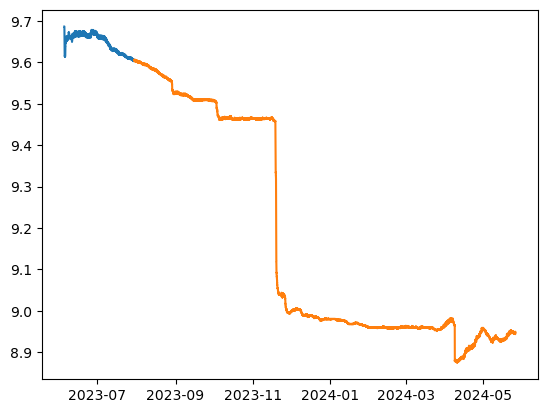

In [193]:
plt.figure()
plt.plot(Kar1_s['Date'],Kar1_s['Slip'])
plt.plot(Kar2["'kkdate!\'"],Kar2['kkoblique'])
plt.show()

In [200]:
ortho_diff = Kar1_s['Ortho'].iloc[-1] - Kar2['kkorthogonal'].iloc[0]
Kar2['kkorthogonal'] = Kar2['kkorthogonal']+ortho_diff

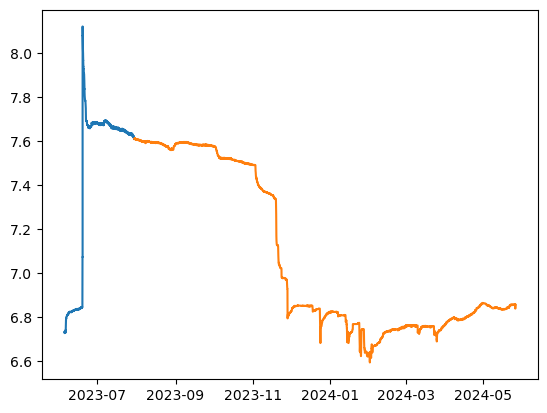

In [201]:
plt.figure()
plt.plot(Kar1_s['Date'],Kar1_s['Ortho'])
plt.plot(Kar2["'kkdate!\'"],Kar2['kkorthogonal'])
plt.show()

In [202]:
Kar2.rename(columns={"'kkdate!\'":'Date','kkoblique':'Slip','kkorthogonal':'Ortho'},inplace=True)
Kar2

,Date,Slip,kkObliqueV,Ortho,kkorthoogonalV,kkdegC
0,2023-07-30 09:37:00,9.60436,9.83810,7.61140,5.00512,27.0874
1,2023-07-30 09:38:00,9.60436,9.83810,7.61140,5.00512,27.0874
2,2023-07-30 09:39:00,9.60473,9.83810,7.61140,5.00512,27.0874
3,2023-07-30 09:40:00,9.60436,9.83810,7.61140,5.00528,27.0874
4,2023-07-30 09:41:00,9.60436,9.83810,7.61140,5.00528,27.0874
...,...,...,...,...,...,...
433268,2024-05-26 06:45:00,8.94882,7.84179,6.85949,5.00231,16.7487
433269,2024-05-26 06:46:00,8.94882,7.83764,6.85793,5.00231,16.7487
433270,2024-05-26 06:47:00,8.94919,7.78650,6.83867,5.00231,16.7487
433271,2024-05-26 06:48:00,8.94882,7.79648,6.84243,5.00231,16.7487


In [205]:
kar = pd.concat([Kar1_s,Kar2],ignore_index=True)
kar

,Date,Slip,Ortho,kkObliqueV,kkorthoogonalV,kkdegC
0,2023-06-05 05:38:00,9.68706,6.73150,NaN,NaN,NaN
1,2023-06-05 05:39:00,9.68706,6.73110,NaN,NaN,NaN
2,2023-06-05 05:40:00,9.68706,6.73110,NaN,NaN,NaN
3,2023-06-05 05:41:00,9.68706,6.73080,NaN,NaN,NaN
4,2023-06-05 05:42:00,9.68666,6.73080,NaN,NaN,NaN
...,...,...,...,...,...,...
512697,2024-05-26 06:45:00,8.94882,6.85949,7.84179,5.00231,16.7487
512698,2024-05-26 06:46:00,8.94882,6.85793,7.83764,5.00231,16.7487
512699,2024-05-26 06:47:00,8.94919,6.83867,7.78650,5.00231,16.7487
512700,2024-05-26 06:48:00,8.94882,6.84243,7.79648,5.00231,16.7487


In [206]:
df_kar = pd.DataFrame({'Date':kar['Date'],'Slip':kar['Slip']})
df_kar_T = pd.DataFrame({'Date':kar['Date'],'degC':kar['kkdegC']})
df_kar_O = pd.DataFrame({'Date':kar['Date'],'Ortho':kar['Ortho']})
df_kar_T.dropna(inplace=True)
df_kar_T.reset_index(inplace=True,drop=True)
df_kar_O.dropna(inplace=True)
df_kar_O.reset_index(inplace=True,drop=True)

df_kar_V = pd.DataFrame({'Date':kar['Date'],'Volts':kar['kkObliqueV']})
df_kar_OV = pd.DataFrame({'Date':kar['Date'],'OrthoVolts':kar['kkorthoogonalV']})
df_kar_V.dropna(inplace=True)
df_kar_V.reset_index(inplace=True,drop=True)
df_kar_OV.dropna(inplace=True)
df_kar_OV.reset_index(inplace=True,drop=True)

df_kar.to_csv(("../../Data/East_Anatolian_Fault/CSV/kar1.csv"))
df_kar_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Temp.csv"))
df_kar_V.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Voltage.csv"))
df_kar_O.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Orthogonal.csv"))
df_kar_OV.to_csv(("../../Data/East_Anatolian_Fault/CSV/Karakose_Orthogonal_Voltage.csv"))


: 

Canyonlands

In [104]:
can = pd.read_csv('../../Data/Utah/Raw/Canyonlands_Jun2012_Jun2017.txt')

In [106]:
can['canyonDay'] = pd.to_datetime(can['canyonDay'])

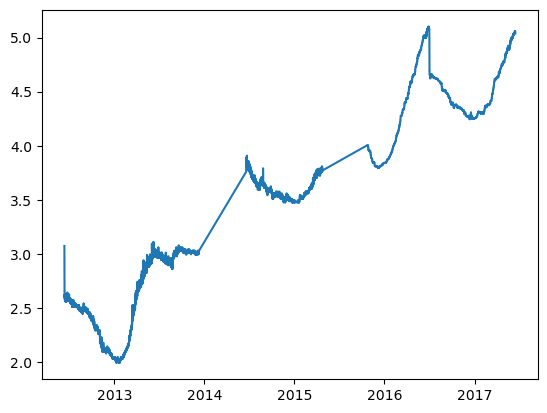

In [107]:
plt.figure()
plt.plot(can['canyonDay'],can['Rawmm'])
plt.show()

In [108]:
df_can = pd.DataFrame({'Date':can['canyonDay'],'Slip':can['Rawmm']})
df_can_T = pd.DataFrame({'Date':can['canyonDay'],'degC':can['DegreesC']})
df_can.to_csv(("../../Data/Utah/CSV/can1.csv"))
df_can_T.to_csv(("../../Data/Utah/CSV/Canyonlands_Temp.csv"))

In [110]:
gb = pd.read_csv('../../Data/Ridgecrest/Raw/GB_ridgecrest.txt')
gb.dropna(inplace=True)


In [113]:
gb['GBmm\\']=gb['GBmm\\'].apply(lambda x: float(str(x)[:-1]))
gb['GBtime'] = pd.to_datetime(gb['GBtime'])

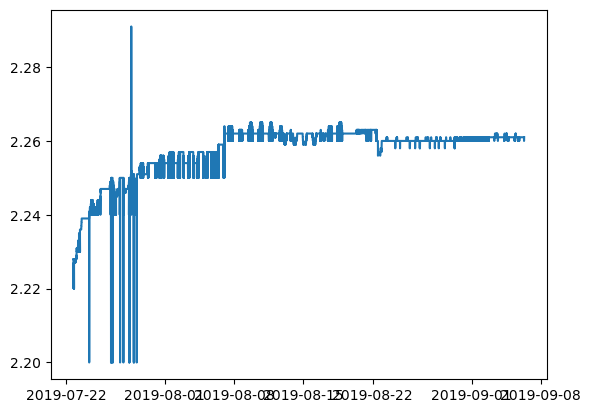

In [114]:
plt.figure()
plt.plot(gb['GBtime'],gb['GBmm\\'])
plt.show()

In [115]:
df_gb = pd.DataFrame({'Date':gb['GBtime'],'Slip':gb['GBmm\\']})
df_gb.to_csv('../../Data/Ridgecrest/CSV/gb.csv')

In [117]:
gs = pd.read_csv('../../Data/Ridgecrest/Raw/GS_ridgecrest_edited.txt')
gs

,GStime,GSmmEdited\
0,07/20/2019 16:31:03,2.3005\
1,07/20/2019 16:31:13,2.3005\
2,07/20/2019 16:31:23,2.3005\
3,07/20/2019 16:31:33,2.3011\
4,07/20/2019 16:31:43,2.3031\
...,...,...
114384,10/01/2019 06:40:00,2.2675\
114385,10/01/2019 06:50:00,2.2675\
114386,10/01/2019 07:00:00,2.2662\
114387,10/01/2019 07:10:00,2.2662\


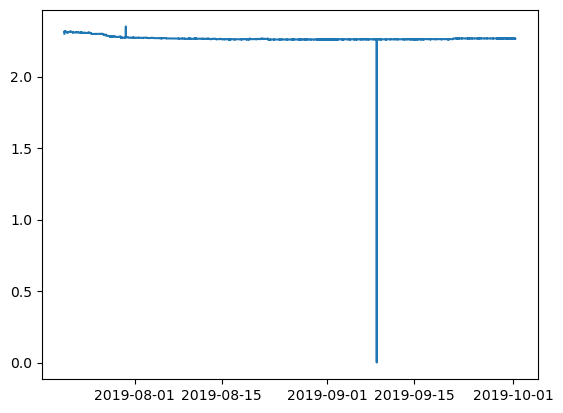

In [119]:
df_gs = pd.DataFrame({'Date':pd.to_datetime(gs['GStime']),'Slip':gs['GSmmEdited\\'].apply(lambda x: float(str(x)[:-1]))})
plt.figure()
plt.plot(df_gs['Date'],df_gs['Slip'])
plt.show()

df_gs.to_csv('../../Data/Ridgecrest/CSV/gs.csv')

In [120]:
r7 = pd.read_csv('../../Data/Ridgecrest/Raw/R7_ridgecrest.txt')
r7

,R7C,R7day,R7mm\
0,29.577,07/19/2019 15:25:27,2.4004\
1,30.976,07/19/2019 15:26:27,2.3959\
2,30.809,07/19/2019 15:27:27,2.4139\
3,30.689,07/19/2019 15:28:27,2.4135\
4,30.566,07/19/2019 15:29:27,2.4114\
...,...,...,...
138087,34.982,09/05/2019 14:32:53,2.4723\
138088,34.981,09/05/2019 14:33:53,2.4735\
138089,34.979,09/05/2019 14:34:53,2.4709\
138090,34.977,09/05/2019 14:35:53,2.4709\


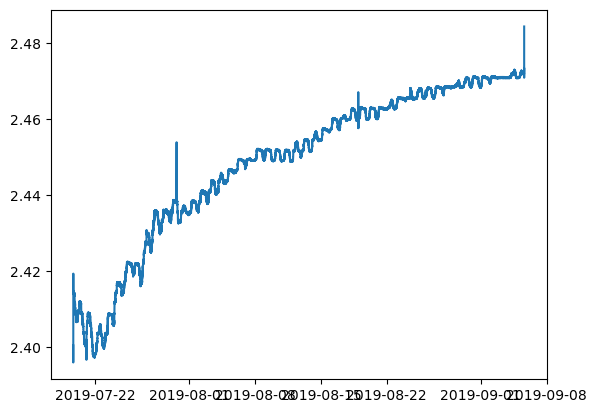

In [122]:
r7['R7day'] = pd.to_datetime(r7['R7day'])

df_R7 = pd.DataFrame({'Date':r7['R7day'],'Slip':r7['R7mm\\'].apply(lambda x: float(str(x)[:-1]))})
df_R7.to_csv('../../Data/Ridgecrest/CSV/r7.csv')

plt.figure()
plt.plot(df_R7['Date'],df_R7['Slip'])
plt.show()

df_R7_T = pd.DataFrame({'Date':r7['R7day'],'degC':r7['R7C']})
df_R7_T.to_csv('../../Data/Ridgecrest/CSV/r7_Temp.csv')

In [123]:
ra = pd.read_csv('../../Data/Ridgecrest/Raw/RA_ridgecrest.txt')
ra

,RAdegC,RAmm,RAtime\
0,26.956,8.7590,07/22/2019 13:47:41\
1,26.954,8.7590,07/22/2019 13:47:51\
2,26.951,8.7590,07/22/2019 13:48:01\
3,26.946,8.7590,07/22/2019 13:48:11\
4,26.943,8.7590,07/22/2019 13:48:21\
...,...,...,...
123631,34.709,8.8281,09/05/2019 15:14:39\
123632,34.707,8.8281,09/05/2019 15:15:39\
123633,34.706,8.8292,09/05/2019 15:16:39\
123634,34.702,8.8307,09/05/2019 15:17:39\


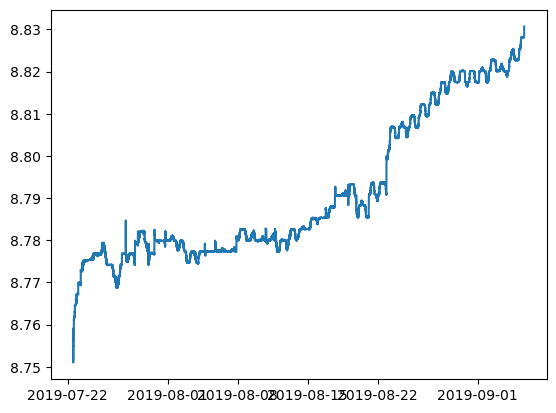

,Date,Slip
0,2019-07-22 13:47:41,8.7590
1,2019-07-22 13:47:51,8.7590
2,2019-07-22 13:48:01,8.7590
3,2019-07-22 13:48:11,8.7590
4,2019-07-22 13:48:21,8.7590
...,...,...
123631,2019-09-05 15:14:39,8.8281
123632,2019-09-05 15:15:39,8.8281
123633,2019-09-05 15:16:39,8.8292
123634,2019-09-05 15:17:39,8.8307


In [125]:
ra['RAtime\\'] = pd.to_datetime(ra['RAtime\\'].apply(lambda x: x[:-1] if isinstance(x, str) else x))

df_RA = pd.DataFrame({'Date':ra['RAtime\\'],'Slip':ra['RAmm']})
df_RA.to_csv('../../Data/Ridgecrest/CSV/ra.csv')

plt.figure()
plt.plot(df_RA['Date'],df_RA['Slip'])
plt.show()

df_RA_T = pd.DataFrame({'Date':ra['RAtime\\'],'degC':ra['RAdegC']})
df_RA_T.to_csv('../../Data/Ridgecrest/CSV/ra_Temp.csv')
df_RA

In [17]:
rb = pd.read_csv('../../Data/Ridgecrest/Raw/RB_ridgecrest.txt')
rb

,RBmm,RBtime\
0,0.9120,07/09/2019 02:11:18\
1,0.9115,07/09/2019 02:12:18\
2,0.9345,07/09/2019 02:13:18\
3,0.9327,07/09/2019 02:14:18\
4,0.9328,07/09/2019 02:15:18\
...,...,...
154161,1.6593,09/05/2019 15:30:34\
154162,1.6591,09/05/2019 15:31:34\
154163,1.6593,09/05/2019 15:32:34\
154164,1.6593,09/05/2019 15:33:34\


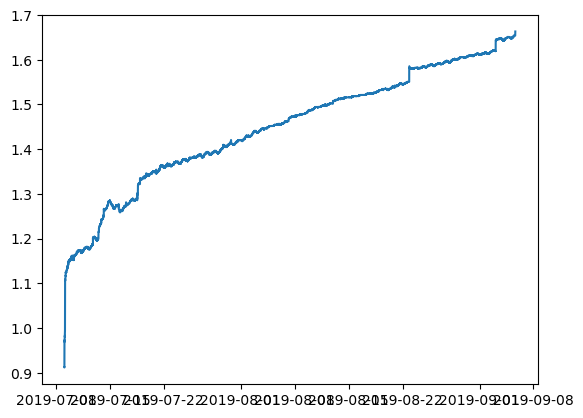

In [127]:
df_RB = pd.DataFrame({'Date':rb['RBtime\\'].apply(lambda x: x[:-1] if isinstance(x, str) else x),'Slip':rb['RBmm']})
df_RB['Date'] = pd.to_datetime(df_RB['Date'])
plt.figure()
plt.plot(df_RB['Date'],df_RB['Slip'])
plt.show()
#df_RB.to_csv('../../Data/Ridgecrest/CSV/rb.csv')

In [129]:
pet = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/Petrol.txt')
pet

,Date,Slip
0,09/26/2017 11:23:57,5.1276\
1,09/26/2017 11:53:57,5.1358\
2,09/26/2017 12:23:57,5.1331\
3,09/26/2017 12:53:57,5.1331\
4,09/26/2017 13:23:57,5.1303\
...,...,...
549225,10/09/2019 10:12:25,6.645\
549226,10/09/2019 10:13:25,6.4833\
549227,10/09/2019 10:14:25,6.472\
549228,10/09/2019 10:15:25,6.4668\


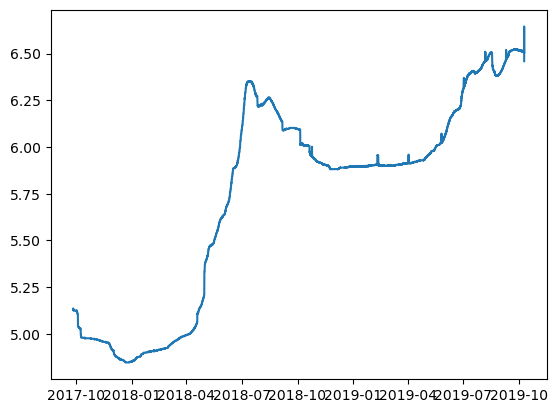

In [130]:
df_pet = pd.DataFrame({'Date':pd.to_datetime(pet['Date']),'Slip':pet['Slip'].apply(lambda x: float(str(x)[:-1]))})

plt.figure()
plt.plot(df_pet['Date'],df_pet['Slip'])
plt.show()
df_pet.to_csv('../../Data/North_Anatolian_Fault/CSV/pet1.csv')

In [132]:
sel = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/Seller.txt')
sel

,SellerTime,Sellermm\
0,10/08/2019 05:13:39,6.7376\
1,10/08/2019 05:14:09,6.7309\
2,10/08/2019 05:14:39,6.7296\
3,10/08/2019 05:15:09,6.7287\
4,10/08/2019 05:15:39,6.7303\
...,...,...
363455,02/11/2020 10:03:33,8.7504\
363456,02/11/2020 10:04:03,8.7504\
363457,02/11/2020 10:04:33,8.7504\
363458,02/11/2020 10:05:00,8.7504\


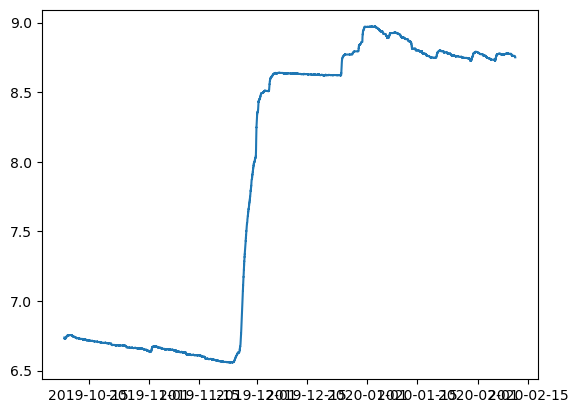

In [133]:
df_sel = pd.DataFrame({'Date':pd.to_datetime(sel['SellerTime']),'Slip':sel['Sellermm\\'].apply(lambda x: float(str(x)[:-1]))})
plt.figure()
plt.plot(df_sel['Date'],df_sel['Slip'])
plt.show()
df_sel.to_csv('../../Data/North_Anatolian_Fault/CSV/sel1.csv')

In [136]:
tep = pd.read_csv('../../Data/North_Anatolian_Fault/Raw/Tepetarla.txt')
tep

,tepetarlatime,tepetarlamm\
0,10/08/2019 06:21:27,5.898\
1,10/08/2019 06:21:57,5.8966\
2,10/08/2019 06:22:27,5.8944\
3,10/08/2019 06:22:57,5.8939\
4,10/08/2019 06:23:27,5.8958\
...,...,...
363224,02/11/2020 09:10:47,8.8766\
363225,02/11/2020 09:11:17,8.869\
363226,02/11/2020 09:11:47,8.8693\
363227,02/11/2020 09:12:00,8.8693\


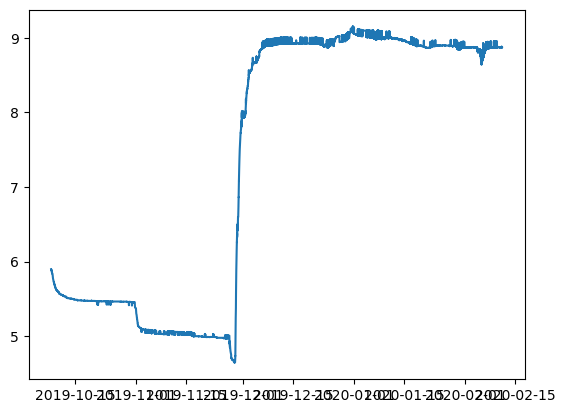

In [137]:
df_tep = pd.DataFrame({'Date':pd.to_datetime(tep['tepetarlatime']),'Slip':tep['tepetarlamm\\'].apply(lambda x: float(str(x)[:-1]))})
plt.figure()
plt.plot(df_tep['Date'],df_tep['Slip'])
plt.show()
df_tep.to_csv('../../Data/North_Anatolian_Fault/CSV/tep1.csv')

Tasmis

In [5]:
Tas1 = pd.DataFrame({'Date':multi_instument['CreepUTC'],'Slip':multi_instument['Tasmis']})
Tas1.dropna(inplace=True)
Tas1.reset_index(inplace=True,drop=True)
Tas1

,Date,Slip
0,2023-06-01 10:55:00,3.63613
1,2023-06-01 10:56:00,3.63503
2,2023-06-01 10:57:00,3.63503
3,2023-06-01 10:58:00,3.63473
4,2023-06-01 10:59:00,3.63473
...,...,...
186754,2023-11-05 23:33:00,5.41440
186755,2023-11-05 23:34:00,5.41440
186756,2023-11-05 23:35:00,5.41440
186757,2023-11-05 23:36:00,5.41410


In [6]:
Tas2 = pd.read_csv('../../Data/East_Anatolian_Fault/Raw/TasmisPt2.txt',delimiter='\t')
Tas2['Tday'] = pd.to_datetime(Tas2['Tday'],dayfirst=True)
Tas2

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_14645/529114178.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Tas2['Tday'] = pd.to_datetime(Tas2['Tday'],dayfirst=True)


,Tday,TdegC,Tmm
0,2023-09-28 13:43:45,31.588,5.2372
1,2023-09-28 13:44:45,31.676,5.2374
2,2023-09-28 13:45:45,31.745,5.2374
3,2023-09-28 13:46:45,31.794,5.2372
4,2023-09-28 13:47:45,31.825,5.2374
...,...,...,...
346757,2024-05-26 11:08:00,35.372,NaN
346758,2024-05-26 11:09:00,36.556,6.5412
346759,2024-05-26 11:10:00,37.768,6.4955
346760,2024-05-26 11:11:00,38.637,6.4845


In [7]:
Tas3 = pd.read_csv('../../Data/East_Anatolian_Fault/Raw/TasmisPt3.txt',delimiter='\t')
Tas3['TasmisLocalDay'] = pd.to_datetime(Tas3['TasmisLocalDay'],dayfirst=True)
Tas3

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_14645/1995252588.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Tas3['TasmisLocalDay'] = pd.to_datetime(Tas3['TasmisLocalDay'],dayfirst=True)


,TasmisLocalDay,TasmisLocalEdited
0,2023-12-02 06:42:03,6.54770
1,2023-12-02 06:42:04,6.54770
2,2023-12-02 06:43:03,6.54770
3,2023-12-02 06:44:03,6.54770
4,2023-12-02 06:45:03,6.54770
...,...,...
271131,2024-09-26 23:40:00,9.25206
271132,2024-09-26 23:50:00,9.25206
271133,2024-09-27 00:00:00,9.24931
271134,2024-09-27 00:10:00,9.24931


In [13]:
boolarr = Tas2['Tday']>Tas1['Date'].iloc[-1]
Tas2_s1 = Tas2[boolarr]
Tas2_s1

,Tday,TdegC,Tmm
55314,2023-11-05 23:37:45,18.598,5.6465
55315,2023-11-05 23:38:45,18.595,5.6465
55316,2023-11-05 23:39:45,18.592,5.6465
55317,2023-11-05 23:40:45,18.589,5.6465
55318,2023-11-05 23:41:45,18.586,5.6465
...,...,...,...
346757,2024-05-26 11:08:00,35.372,NaN
346758,2024-05-26 11:09:00,36.556,6.5412
346759,2024-05-26 11:10:00,37.768,6.4955
346760,2024-05-26 11:11:00,38.637,6.4845


In [14]:
slip_diff1 = Tas2_s1['Tmm'].iloc[0] - Tas1['Slip'].iloc[-1]
Tas2_s1['Tmm'] = Tas2_s1['Tmm'] - slip_diff1

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_14645/1640234455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tas2_s1['Tmm'] = Tas2_s1['Tmm'] - slip_diff1


In [15]:
boolarr2 = Tas2_s1['Tday']<Tas3['TasmisLocalDay'].iloc[0]
Tas2_s2 = Tas2_s1[boolarr2]
Tas2

,Tday,TdegC,Tmm
0,2023-09-28 13:43:45,31.588,5.2372
1,2023-09-28 13:44:45,31.676,5.2374
2,2023-09-28 13:45:45,31.745,5.2374
3,2023-09-28 13:46:45,31.794,5.2372
4,2023-09-28 13:47:45,31.825,5.2374
...,...,...,...
346757,2024-05-26 11:08:00,35.372,NaN
346758,2024-05-26 11:09:00,36.556,6.5412
346759,2024-05-26 11:10:00,37.768,6.4955
346760,2024-05-26 11:11:00,38.637,6.4845


In [16]:
slip_diff2 = Tas3['TasmisLocalEdited'].iloc[0] - Tas2_s2['Tmm'].iloc[-1]
print(slip_diff2)

1.0930999999999997


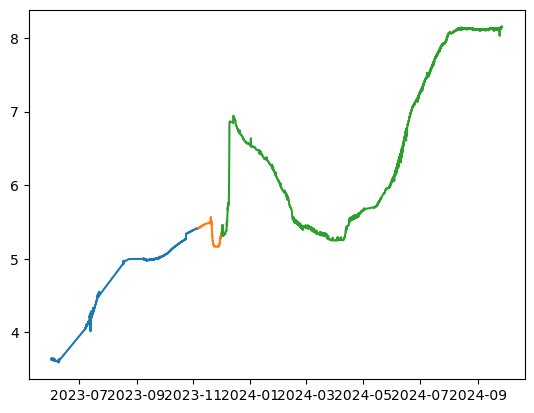

In [17]:
plt.figure()
plt.plot(Tas1['Date'],Tas1['Slip'])
plt.plot(Tas2_s2['Tday'],Tas2_s2['Tmm'])
plt.plot(Tas3['TasmisLocalDay'],Tas3['TasmisLocalEdited']-slip_diff2)
plt.show()

In [18]:
df_tas2 = pd.DataFrame({'Date':Tas2_s2['Tday'],'Slip':Tas2_s2['Tmm'],'degC':Tas2_s2['TdegC']})
df_tas3 = pd.DataFrame({'Date':Tas3['TasmisLocalDay'],'Slip':Tas3['TasmisLocalEdited']})

tas = pd.concat([Tas1,df_tas2],ignore_index=True)
tas = pd.concat([tas,df_tas3],ignore_index=True)
tas

,Date,Slip,degC
0,2023-06-01 10:55:00,3.63613,NaN
1,2023-06-01 10:56:00,3.63503,NaN
2,2023-06-01 10:57:00,3.63503,NaN
3,2023-06-01 10:58:00,3.63473,NaN
4,2023-06-01 10:59:00,3.63473,NaN
...,...,...,...
495750,2024-09-26 23:40:00,9.25206,NaN
495751,2024-09-26 23:50:00,9.25206,NaN
495752,2024-09-27 00:00:00,9.24931,NaN
495753,2024-09-27 00:10:00,9.24931,NaN


In [19]:
df_tas = pd.DataFrame({'Date':tas['Date'],'Slip':tas['Slip']})
df_tas_T = pd.DataFrame({'Date':tas['Date'],'degC':tas['degC']})
df_tas_T.dropna(inplace=True)
df_tas_T.reset_index(inplace=True,drop=True)

df_tas.to_csv(("../../Data/East_Anatolian_Fault/CSV/tas1.csv"))
df_tas_T.to_csv(("../../Data/East_Anatolian_Fault/CSV/Tasmis_Temp.csv"))

C461

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/2862367873.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_c4611 = pd.DataFrame({'Date':pd.to_datetime(c4611['c46Transmitteday'],dayfirst=True),'Slip':c4611['\'c46transmitted mm\'']})


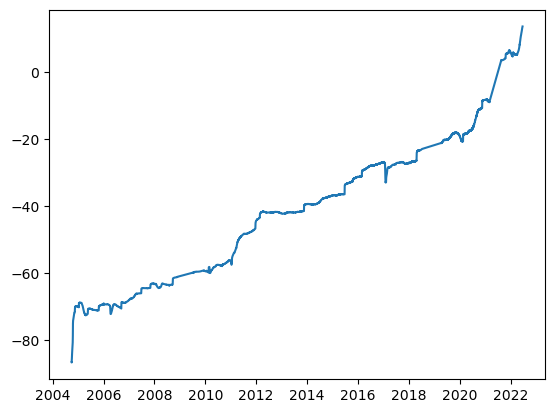

In [25]:
c4611 = pd.read_csv('../../Data/Central_San_Andreas_Fault/Raw/c461Pt1.txt',delimiter='\t')
df_c4611 = pd.DataFrame({'Date':pd.to_datetime(c4611['c46Transmitteday'],dayfirst=True),'Slip':c4611['\'c46transmitted mm\'']})

plt.figure()
plt.plot(df_c4611['Date'],df_c4611['Slip'])
plt.show()
df_c4611.to_csv('../../Data/Central_San_Andreas_Fault/CSV/c461.csv')

In [23]:
c4611

,'c46transmitted mm',c46Transmitteday
0,-86.572,29/9/04 02:20:00
1,-86.625,29/9/04 02:30:00
2,-86.617,29/9/04 02:40:00
3,-86.612,29/9/04 02:50:00
4,-86.607,29/9/04 03:00:00
...,...,...
806822,13.570,20/6/22 12:00:00
806823,13.570,20/6/22 12:10:00
806824,13.570,20/6/22 12:20:00
806825,13.570,20/6/22 12:30:00


C462

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_4468/2046212255.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_c4612 = pd.DataFrame({'Date':pd.to_datetime(c4612['c46day'],dayfirst=True),'Slip':c4612['c46extension']})


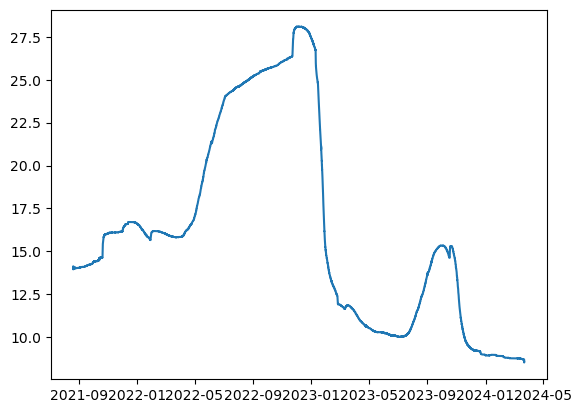

,c46day,c46extension
0,19/8/21 19:10:11,14.0969
1,19/8/21 19:11:11,14.0753
2,19/8/21 19:12:11,14.0753
3,19/8/21 19:13:11,14.0738
4,19/8/21 19:14:11,14.0736
...,...,...
1361034,22/3/24 01:02:20,8.5663
1361035,22/3/24 01:03:20,8.5205
1361036,22/3/24 01:04:20,8.5549
1361037,22/3/24 01:05:04,NaN


In [26]:
c4612 = pd.read_csv('../../Data/Central_San_Andreas_Fault/Raw/c461Pt2.txt',delimiter='\t')
df_c4612 = pd.DataFrame({'Date':pd.to_datetime(c4612['c46day'],dayfirst=True),'Slip':c4612['c46extension']})
plt.figure()
plt.plot(df_c4612['Date'],df_c4612['Slip'])
plt.show()
df_c4612.to_csv('../../Data/Central_San_Andreas_Fault/CSV/c462.csv')
c4612


GD

In [12]:
gd = pd.read_csv('../../Data/Ridgecrest/Raw/GD_Garlock.txt',delimiter = '\t')

In [13]:
gd['GDtime'] = pd.to_datetime(gd['GDtime'],dayfirst=True)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_3955/1901249211.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gd['GDtime'] = pd.to_datetime(gd['GDtime'],dayfirst=True)


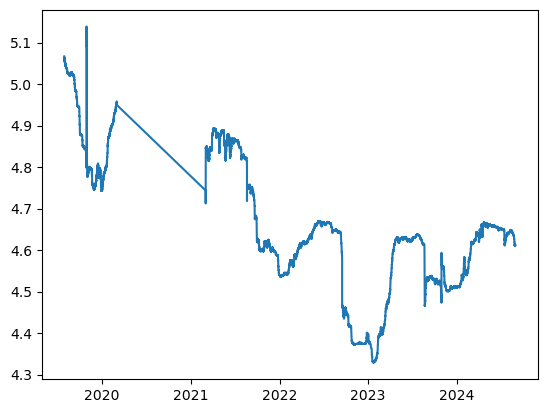

In [14]:
plt.figure()
plt.plot(gd['GDtime'],gd['GDmm'])
plt.show()

In [16]:
df_GD = pd.DataFrame({'Date':gd['GDtime'],'Slip':gd['GDmm']})
df_GD_T = pd.DataFrame({'Date':gd['GDtime'],'degC':gd['GDdegC']})

df_GD.to_csv('../../Data/Ridgecrest/CSV/gd.csv')
df_GD_T.to_csv('../../Data/Ridgecrest/CSV/gd_Temp.csv')